# LUMPREM 

In [1]:
import lumpyrem as lr
import os

In [2]:
# set the workspace directory
cwd = os.getcwd()
workspace = os.path.join(cwd,'workspace')

# initiate the model and write the in files
b = lr.lumprem.Model(model_name='def', workspace=workspace)
b.write_model()

# run themodel
b.run_model()

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_def.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_def.in read ok.
 
 Cannot open vegetation file.



In [3]:
# get model results
results = b.get_results()
results.head()

,days,volume,vol_drain,vol_macro,delta_vol,del_vol_drain,del_vol_macro,rainfall,irrigation,recharge,...,mflowmax,offset,factor1,factor2,power,elevmin,elevmax,surface,vol,workspace
0,0.0,0.250000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,...,0.1,0.0,2.0,3.0,0.5,-9999.0,10000.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
1,31.0,0.260354,0.008317,0.0,0.010354,0.008317,0.0,0.0708,0.0,0.034416,...,0.1,0.0,2.0,3.0,0.5,-9999.0,10000.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
2,59.0,0.218230,0.003553,0.0,-0.042124,-0.004764,0.0,0.0068,0.0,0.034382,...,0.1,0.0,2.0,3.0,0.5,-9999.0,10000.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
3,90.0,0.204296,0.001994,0.0,-0.013934,-0.001559,0.0,0.0218,0.0,0.016404,...,0.1,0.0,2.0,3.0,0.5,-9999.0,10000.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...
4,120.0,0.247053,0.006391,0.0,0.042758,0.004397,0.0,0.1022,0.0,0.031681,...,0.1,0.0,2.0,3.0,0.5,-9999.0,10000.0,0.0,0.25,c:\Users\rui2h\Documents\GitHub\lumpyrem\examp...


In [4]:
# write an irrigation file
b.write_irigfile(3650, 150, 0.3) # number of days, day on which irrigation starts, and fraction of the year with irrigation

# take a look at the file


def printfile(filename):
    print('\nFile: '+os.path.basename(filename))
    f = open(filename,'r')
    print(f.read())
    f.close()
    return

filename = os.path.join(workspace,'irrig.in')
printfile(filename)

Irrigation input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\irrig.in

File: irrig.in
1 0 0.0
150 1 0.5
259 0 0.0
515 1 0.5
624 0 0.0
880 1 0.5
989 0 0.0
1245 1 0.5
1354 0 0.0
1611 1 0.5
1720 0 0.0
1976 1 0.5
2085 0 0.0
2341 1 0.5
2450 0 0.0
2706 1 0.5
2815 0 0.0
3072 1 0.5
3181 0 0.0
3437 1 0.5
3546 0 0.0



In [5]:
# write an irrigation file for a specified start date

b.write_irigfile(3650, 150, 0.3, date_start='01/01/2010', irrigfile='irrig_dates.in')

Irrigation input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\irrig_dates.in


In [6]:
# take a look at the file
filename = os.path.join(workspace,'irrig.in')
printfile(filename)


File: irrig.in
1 0 0.0
150 1 0.5
259 0 0.0
515 1 0.5
624 0 0.0
880 1 0.5
989 0 0.0
1245 1 0.5
1354 0 0.0
1611 1 0.5
1720 0 0.0
1976 1 0.5
2085 0 0.0
2341 1 0.5
2450 0 0.0
2706 1 0.5
2815 0 0.0
3072 1 0.5
3181 0 0.0
3437 1 0.5
3546 0 0.0



In [7]:
# make a model with an irrig in file
c = lr.lumprem.Model('ghj', workspace=workspace)
c.irrigfile = 'irrig_dates.in'

c.write_model(numdays=3650)
c.run_model()
results = c.get_results()
results.plot('days','irrigation')
results.plot('days', 'net_recharge')

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_ghj.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghj.in read ok.
 
 Cannot open vegetation file.



In [8]:
# see the names of columns in the LUMPREM output file
results.columns

Index(['days', 'volume', 'vol_drain', 'vol_macro', 'delta_vol',
       'del_vol_drain', 'del_vol_macro', 'rainfall', 'irrigation', 'recharge',
       'macro_rech', 'total_rech', 'gw_withdrawal', 'net_recharge', 'runoff',
       'pot_evap', 'evaporation', 'gw_pot_evap', 'balance', 'elevation',
       'depth-to-water', 'lumprem_model_name', 'rainfile', 'epotfile',
       'vegfile', 'irrigfile', 'maxvol', 'irrigvolfrac', 'rdelay', 'mdelay',
       'ks', 'M', 'L', 'mflowmax', 'offset', 'factor1', 'factor2', 'power',
       'elevmin', 'elevmax', 'surface', 'vol', 'workspace'],
      dtype='object')

## Creating head timeseries

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_ghb.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghb.in read ok.
 - file lr_ghb.out written ok.



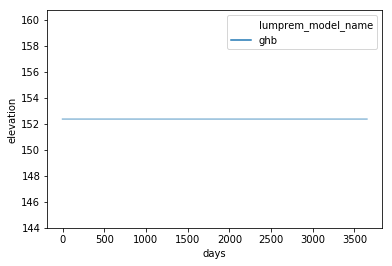

In [20]:
ghb = lr.lumprem.Model('ghb', workspace=workspace,factor1=1.0,
                                                    factor2=2.0,
                                                    power=0.1,
                                                    offset=150.0,
                                                    maxvol=1,
                                                    surface=200,
                                                    ks=0.1,
                                                    irrigvolfrac=0.0,
                                                    vegfile=(0.8,1.0), irrigfile = (0, 0.0))
ghb.write_model(numdays=3650)
ghb.run_model()
df=ghb.get_results()
# plot the model results
import seaborn as sb
sb.lineplot(data=df, x='days',y='elevation', hue='lumprem_model_name', alpha=0.5)
#sb.lineplot(data=df, x='days',y='volume', hue='lumprem_model_name', alpha=0.5)

# Using LR2SERIES
## Generates MODFLOW6 timeseries file from several LUMPREM model outputs

In [10]:
# make a mf6 tseries file

# run some LUMPREM models. These have to have the same time configuration.
# make a list of the lumprem models
model_names = ['abc','def','ghi']
lr_models =[]
for name in model_names:
    model = lr.lumprem.Model(model_name=name, workspace=workspace, vegfile=(0.5,1.0))

    lr_models.append(model)

    model.write_model(numdays=3650, noutdays='monthly', start_date='01/01/2010', end_date='01/01/2020') #note that numdays is ignored in favour of start/enddate and
    model.run_model()


# make a list of lumprem output columns to read
lumprem_output_cols = ['net_recharge','gw_withdrawal']

# make a list of timseries names for the column to be used in the ts file. Length and sequence of ts_names and lumprem columns must match!
ts_names = ['rech','pumping']

# make a list of methods for the timeseries
methods = ['linearend','linear']

#initialize the timeseries object
rechts = lr.lr2series.TimeSeries('rch.ts',workspace=workspace, lr_models=lr_models, lumprem_output_cols=lumprem_output_cols, ts_names=ts_names, methods=methods)

# write lr2series input and ts file
rechts.write_ts()

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_abc.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_abc.in read ok.
 - file lr_abc.out written ok.

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_def.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_def.in read ok.
 - file lr_def.out written ok.

LUMPREM model input file written to: 
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\lr_ghi.in

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghi.in read ok.
 - file lr_ghi.out written ok.

MF6 timeseries file c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\rch.ts.in written to:
c:\Users\rui2h\Documents\GitHub\lumpyrem\examples\workspace\rch.ts.in
 Enter name of LR2SERIES control file:  
 - reading file rch.ts.in...
 
 - reading LUMPREM

In [11]:
filename = os.path.join(workspace,'rch.ts')
printfile(filename)


File: rch.ts
BEGIN ATTRIBUTES
   NAMES rech_abc pumping_abc rech_def pumping_def rech_ghi pumping_ghi
   METHODS LINEAREND LINEAR LINEAREND LINEAR LINEAREND LINEAR
END ATTRIBUTES
 
 
BEGIN TIMESERIES
   0.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000    
   31.00000      1.1102045E-03   0.000000      1.1102045E-03   0.000000      1.1102045E-03   0.000000    
   59.00000      1.2279307E-03   0.000000      1.2279307E-03   0.000000      1.2279307E-03   0.000000    
   90.00000      5.2915871E-04   0.000000      5.2915871E-04   0.000000      5.2915871E-04   0.000000    
   120.0000      1.0560290E-03   0.000000      1.0560290E-03   0.000000      1.0560290E-03   0.000000    
   151.0000      1.9073794E-03  1.1360987E-04  1.9073794E-03  1.1360987E-04  1.9073794E-03  1.1360987E-04
   181.0000     -3.8885933E-04  1.6653903E-03 -3.8885933E-04  1.6653903E-03 -3.8885933E-04  1.6653903E-03
   212.0000     -3.5476097E-04  1.6239606E-03 -3.5476097E

# Using LUMPREP

In [12]:
z = lr.lumprep.Simulation(lr_models,('silofile.txt', 'evap'),'01/01/2000','01/01/2010')
z.model_names

['abc', 'def', 'ghi']

In [13]:
z.__dict__['silofile']

('silofile.txt', 'evap')

In [14]:
z.write_simulation()

Enter name of LUMPREP control file:  
 - reading file lumprep.in...
 
 START_DATE                  = 01/01/2000
 END_DATE                    = 01/01/2010
 NDAY_OUT                    = monthly
 STEPS_PER_DAY               = 1
 SILOFILE                    = silofile.txt
 EVAPCOLSTRING               = "evap"
 - reading file silofile.txt...
 
 Cannot open file silofile.txt to read SILO climatic data.



In [15]:
z.run_simulation()

Enter name of LUMPREM2 control file:  Enter name of LUMPREM2 control file:  Enter name of LUMPREM2 control file: 
 Enter name of LUMPREM2 control file:  Enter name of LUMPREM2 control file:  Enter name of LUMPREM2 control file: 
 Enter name of LUMPREM2 control file:  Enter name of LUMPREM2 control file:  Enter name of LUMPREM2 control file: 


In [16]:
z.get_results()

FileNotFoundError: [Errno 2] No such file or directory: 'lr_abc.out'